<a href="https://colab.research.google.com/github/YangHeewoong/DeepLearning_Basic/blob/main/DeepLearning_Chap4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Loss Fucntion(손실 함수)

### 1.1 Sum of squares for error _ SSE(오차제곱합)

In [ ]:
import numpy as np

def sum_squares_error(y, t) :
  return 0.5 * np.sum((y-t)**2)

# correct answer = 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# if answer = 2
y = [.1, .05, .6, .0, .05, .1, .0, .1, .0, .0]
i = sum_squares_error(np.array(y), np.array(t))

# if answer = 7
y = [.1, .05, .1, .0, .05, .1, .0, .6, .0, .0]
j = sum_squares_error(np.array(y), np.array(t))

print('first : {}'.format(i))
print('first : {}'.format(j))

first : 0.09750000000000003
first : 0.5975


### 1.2 Cross entropy error _ CEE(교차 엔트로피 오차)

In [ ]:
import numpy as np

def cross_entropy_error(y, t) :
  delta = 1e-7
  return -np.sum(t * np.log(y + delta))

# correct answer = 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# if answer = 2
y = [.1, .05, .6, .0, .05, .1, .0, .1, .0, .0]
i = cross_entropy_error(np.array(y), np.array(t))

# if answer = 7
y = [.1, .05, .1, .0, .05, .1, .0, .6, .0, .0]
j = cross_entropy_error(np.array(y), np.array(t))

print('first : {}'.format(i))
print('first : {}'.format(j))

first : 0.510825457099338
first : 2.302584092994546


## 2. Mini Batch Learning(미니배치 학습)

#### numpy의 random.choice 함수를 이용해 랜덤으로 batch_size 만큼의 데이터를 선택할 수 있다

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_tarin(batch_mask)
t_batch = t_train(batch_mask)

print('shape of x_train :{}'.format(x_train.shape)) #(60000, 784)
print('shape of t_train :{}'.format(t_train.shape)) #(60000, 10)
print('shape of x_batch :{}'.format(x_batch.shape)) #(10, 784)
print('shape of t_batch :{}'.format(t_batch.shape)) #(10, 10)

#### 손실함수를 구하는 방식은 두 가지가 있다.
####cross_entropy_onehot : 원핫인코딩으로 레이블링 되어있는 경우
####cross_entropy_error : 정답의 값으로 레이블링 되어있는 경우

In [2]:
import numpy as np

def cross_entropy_onehot(y, t) :
  if y.ndim == 1 :
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size


def cross_entropy_error(y, t) :
  if y.ndim == 1 :
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


t = [[0,0,1,0,0,0,0,0,0,0], # 원핫인코딩으로 레이블링 되어있는 경우
     [0,1,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0]]
t2 = [2,1,2] # 정답의 값으로 레이블링 되어있는 경우
y = [[.1, .05, .6, .0, .05, .1, .0, .1, .0, .0],
     [.1, .6, .0, .05, .0, .1, .1, .0, .0, .05],
     [.0, .05, .6, .1, .1, .0, .05, .0, .1, .0]]
i = cross_entropy_onehot(np.array(y), np.array(t))
j = cross_entropy_error(np.array(y), np.array(t2))

print('one-hot encoding : {}'.format(i))
print('number label : {}'.format(j))

one-hot encoding : 0.510825457099338
number label : 0.510825457099338


##### Quiz. 미니배치는 전체 데이터의 일부를 사용한다. 미니배치를 사용하는 장점은 계산 속도(효율적으로 GPU & CPU 사용하기 때문)가 빠르다는 것 외에 또 무엇이 있을까?

## 3. Numerical Differentiation (수치미분)

### 3.1 미분의 나쁜 구현

In [ ]:
def numberical_diff(f, x) :
  h = 1e-50
  return (f(x + h) - f(x)) / h

### 3.2 중심 차분(중앙 차분)

In [13]:
def central_diff(f, x) :
  h = 1e-4
  return (f(x + h) - f(x - h)) / (2*h)

### 3.3 Example of Numerical Differntiation (수치미분의 예)
#### y = 0.01x^2 + 0.1x의 미분 구하기 & x=5, x=10에서의 접선 기울기 구하기 & 어떤 방식이 오차가 적은가

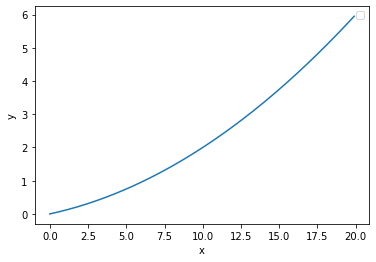

<전방미분>
x=5 일때 접선 기울기 : 0.20000099999917254
x=10 일때 접선 기울기 : 0.3000009999976072

<중앙미분>
x=5 일때 접선 기울기 : 0.1999999999990898
x=10 일때 접선 기울기 : 0.2999999999986347


In [26]:
import numpy as np
import matplotlib.pyplot as plt


# 전방 미분
def forward_diff(f, x) :
  h = 1e-4
  return (f(x + h) - f(x)) / h


# 중앙 미분(중심 차분)
def central_diff(f, x) :
  h = 1e-4
  return (f(x + h) - f(x - h)) / (2*h)


def function_1 (x) :
  return 0.01*x**2 + 0.1*x


x = np.arange(0.0, 20.0, 0.1)
y = function(x)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)
plt.legend()
plt.show()


'''전방 미분''' 
print('<전방미분>')
# x=5 일때 접선 기울기
print('x=5 일때 접선 기울기 : {}'.format(forward_diff(function_1, 5)))

# x=10 일때 접선 기울기
print('x=10 일때 접선 기울기 : {}\n'.format(forward_diff(function_1, 10)))


'''중앙 미분''' 
print('<중앙미분>')
# x=5 일때 접선 기울기
print('x=5 일때 접선 기울기 : {}'.format(central_diff(function_1, 5)))

# x=10 일때 접선 기울기
print('x=10 일때 접선 기울기 : {}'.format(central_diff(function_1, 10)))

#### 중앙 미분으로 계산하였을 때, 오차가 더 적었다

## 4. Partial Differentiation(편미분)

In [10]:
def central_diff(f, x) :
  h = 1e-4
  return (f(x + h) - f(x - h)) / (2*h)


# x[0]^2 + x[1]^2 형태
def function_2 (x) :
  return x[0]**2 + x[1]**2  # 또는 return np.sum(x**2)


# x[0]=3, x[1]=4 일때 x[0]에 대한 편미분
'''
def function_2_tmp0 (x) :
  return x[0]**2 + 4*2
'''
def function_2_tmp0 (x0) :
  return x0*x0 + 4.0**2.0


# x[0]=3, x[1]=4 일때 x[1]에 대한 편미분
'''
def function_2_tmp1 (x) :
  return 3*2 + x[1]**2
'''
def function_2_tmp1 (x1) :
  return 3.0**2.0 + x1*x1


print(central_diff(function_2_tmp0, 3.0))
print(central_diff(function_2_tmp1, 4.0))

6.00000000000378
7.999999999999119


In [12]:
import numpy as np


def function_2 (x) :
  return x[0]**2 + x[1]**2


def numerical_gradient(f, x) :
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열 생성

  for idx in range(x.size) :
    tmp_val = x[idx]
    
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)
    
    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val #값 복원

  return grad


print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]
